In the Titanic example and breast cancer example from class, rerun the code in a separate notebook and print the classification report.
- Task 1: Explain the setup of confusion matrix in both the cases.
- Task 2: Write a detailed notes on each of the following metrics with respect to each of these examples:
    1) Accuracy
    2) Precision
    3) Recall
    4) F1-Score
(Take help from TAs)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Titanic exmaple

In [5]:
# Load the Titanic dataset
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
df = pd.read_csv(url)

# Handle missing values
df = df.dropna(subset=['Age', 'Fare', 'Survived'])

# Convert categorical variable 'Sex' to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Select relevant features and the target variable
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df[features].values
y = df['Survived'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Initialize parameters
theta = np.random.randn(X_b.shape[1])  
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
loss_history = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent
for iteration in range(n_iterations):
    predictions = sigmoid(X_b.dot(theta))
    gradients = 1/m * X_b.T.dot(predictions - y)
    theta = theta - learning_rate * gradients
    loss = -1/m * (y.dot(np.log(predictions)) + (1 - y).dot(np.log(1 - predictions)))
    loss_history.append(loss)

# Make predictions
y_proba = sigmoid(X_b.dot(theta))
y_pred = (y_proba >= 0.5).astype(int)

# Evaluate the model
accuracy = np.mean(y_pred == y)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred, zero_division=0)

# Print evaluation metrics
print(f"\nAccuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.79

Confusion Matrix:
[[463  82]
 [100 242]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       545
           1       0.75      0.71      0.73       342

    accuracy                           0.79       887
   macro avg       0.78      0.78      0.78       887
weighted avg       0.79      0.79      0.79       887



# Analysis

| | predicted positive | predicted negative |
|----------|----------|----------|
| actual positive | ***TP (correct prediction)*** | FN (wrong prediction) |
| actual false | FP (wrongly predicted negative) | ***TN (correctly predicted negative)*** |

- the top left number and the diagonally opposite number shows the total number of correct predictions from all the data points which ammounts to the **accuracy** of the model i.e $ \frac{464 + 243}{464 + 81 + 99 + 243} = 0.797 \approx 0.8 $

- ***recall***  woudld be $ \frac{TP}{TP + FN} = \frac{464}{464+81} = 0.85 $ and this would mean that the model is good at capturing all positive instances, minimizing false negatives.

- ***precision*** would be $\frac{TP}{TP + FN} = \frac{464}{464+99} = 0.82 $ this would show the probability of how many times the model actually made a correct prediction 

- ***F1 score*** would be $ 2 * \frac {precision * recall}{precision + recall} = 2 * \frac {0.82 * 0.85}{0.82 + 0.82} = 0.83 $ this number would show the amount of balance that exists between precision and recall, in out case they are balanced by 83%, though constant measrument of f1 score over different data would show how consistantly the model is performing.

- the crux is that the model will be able to perform better on previously unseen data even though the data has not been split into training and testing sets.

In [4]:
# Create synthetic data for Jack and Rose
synthetic_data = pd.DataFrame({
    'Pclass': [3, 1],
    'Sex': [0, 1],  # Male is 0, Female is 1
    'Age': [20, 17],
    'Fare': [5.0, 100.0]
}, index=['Jack', 'Rose'])
synthetic_data

# Ensure the synthetic data has the same feature order
X_synthetic = synthetic_data[features].values

# Standardize the synthetic features
X_synthetic_scaled = scaler.transform(X_synthetic)

# Add a column of ones to X to account for the bias term (intercept)
X_synthetic_b = np.column_stack([np.ones((X_synthetic_scaled.shape[0], 1)), X_synthetic_scaled])

# Make predictions for Jack and Rose
y_synthetic_proba = sigmoid(X_synthetic_b.dot(theta))
y_synthetic_pred = (y_synthetic_proba >= 0.5).astype(int)

# Print the results
predictions = pd.DataFrame({
    'Passenger': ['Jack', 'Rose'],
    'Survived_Probability': y_synthetic_proba,
    'Survived_Prediction': y_synthetic_pred
}, index=['Jack', 'Rose'])

print(predictions)

     Passenger  Survived_Probability  Survived_Prediction
Jack      Jack              0.110450                    0
Rose      Rose              0.955187                    1


- ### due to fairly good accuracy and precision of the model the outcome actually came out to be what it was in the movie.

# Breast cancer exmaple.

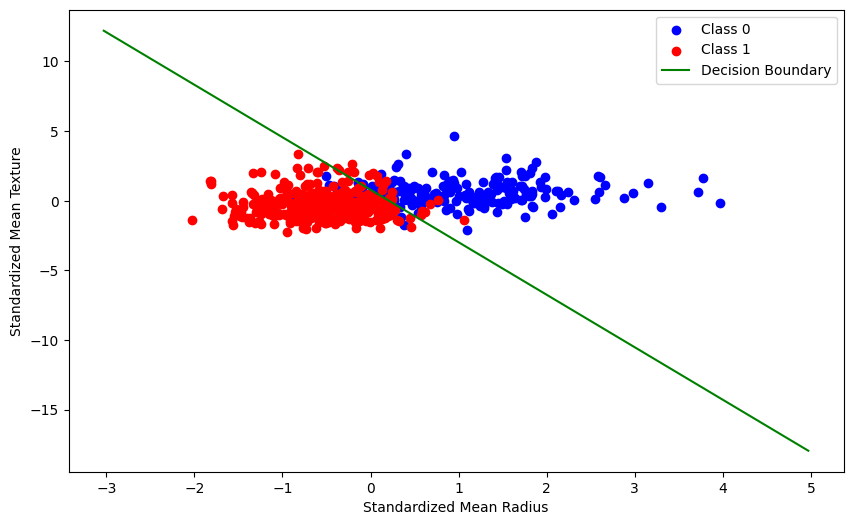

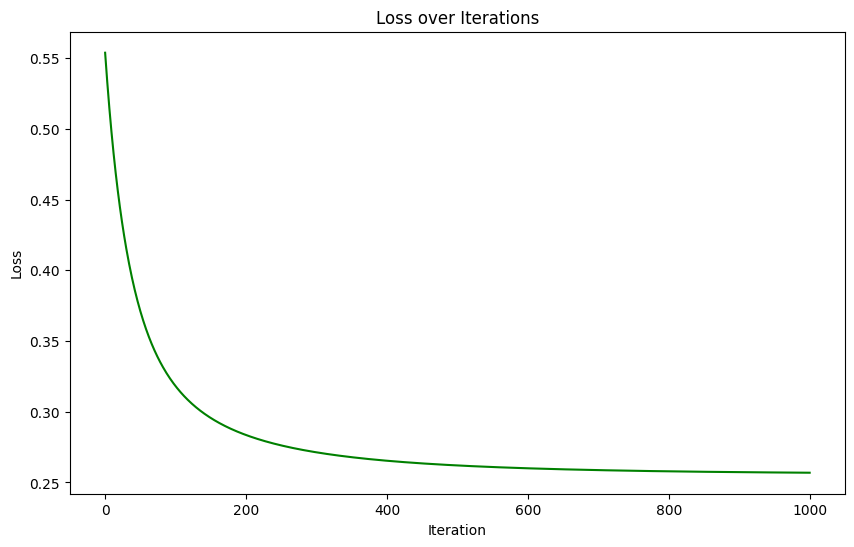

Accuracy: 0.89
Confusion Matrix:
[[172  40]
 [ 22 335]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       212
           1       0.89      0.94      0.92       357

    accuracy                           0.89       569
   macro avg       0.89      0.87      0.88       569
weighted avg       0.89      0.89      0.89       569



In [7]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Use only the first two features for visualization
y = data.target  # Target variable

# Display the first few rows of the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target



# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Initialize parameters
theta = np.random.randn(X_b.shape[1])  
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
loss_history = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent
for iteration in range(n_iterations):
    predictions = sigmoid(X_b.dot(theta))
    gradients = 1/m * X_b.T.dot(predictions - y)
    theta = theta - learning_rate * gradients
    loss = -1/m * (y.dot(np.log(predictions)) + (1 - y).dot(np.log(1 - predictions)))
    loss_history.append(loss)

# Make predictions
y_proba = sigmoid(X_b.dot(theta))
y_pred = (y_proba >= 0.5).astype(int)

# Function to plot decision boundary
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(10, 6))
    
    # Plotting the data points
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='red', label='Class 1')
    
    # Plotting the decision boundary
    x_values = [np.min(X[:, 1] - 1), np.max(X[:, 1] + 1)]
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary', color='green')
    
    plt.xlabel('Standardized Mean Radius')
    plt.ylabel('Standardized Mean Texture')
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_b, y, theta)

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), loss_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Evaluate the model
accuracy = np.mean(y_pred == y)
conf_matrix =confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



# Analysis

| | predicted positive | predicted negative |
|----------|----------|----------|
| actual positive | ***TP (correct prediction)*** | FN (wrong prediction) |
| actual false | FP (wrongly predicted negative) | ***TN (correctly predicted negative)*** |

- the top left number and the diagonally opposite number shows the total number of correct predictions from all the data points which ammounts to the **accuracy** of the model i.e $ \frac{174 + 335}{172 + 40 + 22 + 335} = 0.89 \approx 0.9 $

- ***recall***  woudld be $ \frac{TP}{TP + FN} = \frac{172}{172+40} = 0.81 $ and this would mean that the model is good at capturing all positive instances, minimizing false negatives, in this the model is better at capturin the negative.

- ***precision*** would be $\frac{TP}{TP + FN} = \frac{172}{172+22} = 0.88 \approx 0.88$ this would show the probability of how many times the model actually made a correct prediction 

- ***F1 score*** would be $ 2 * \frac {precision * recall}{precision + recall} = 2 * \frac {0.89 * 0.88}{0.89 + 0.88} = 0.88 $ the measurnment of this metric would show how consistant the model would perform over varying the data in terms of recall and precision.

- the crux is that the model will be able to perform better on previously unseen data even though the data has not been split into training and testing sets even though from the graph the decision boundary does not look very clean 